start
end


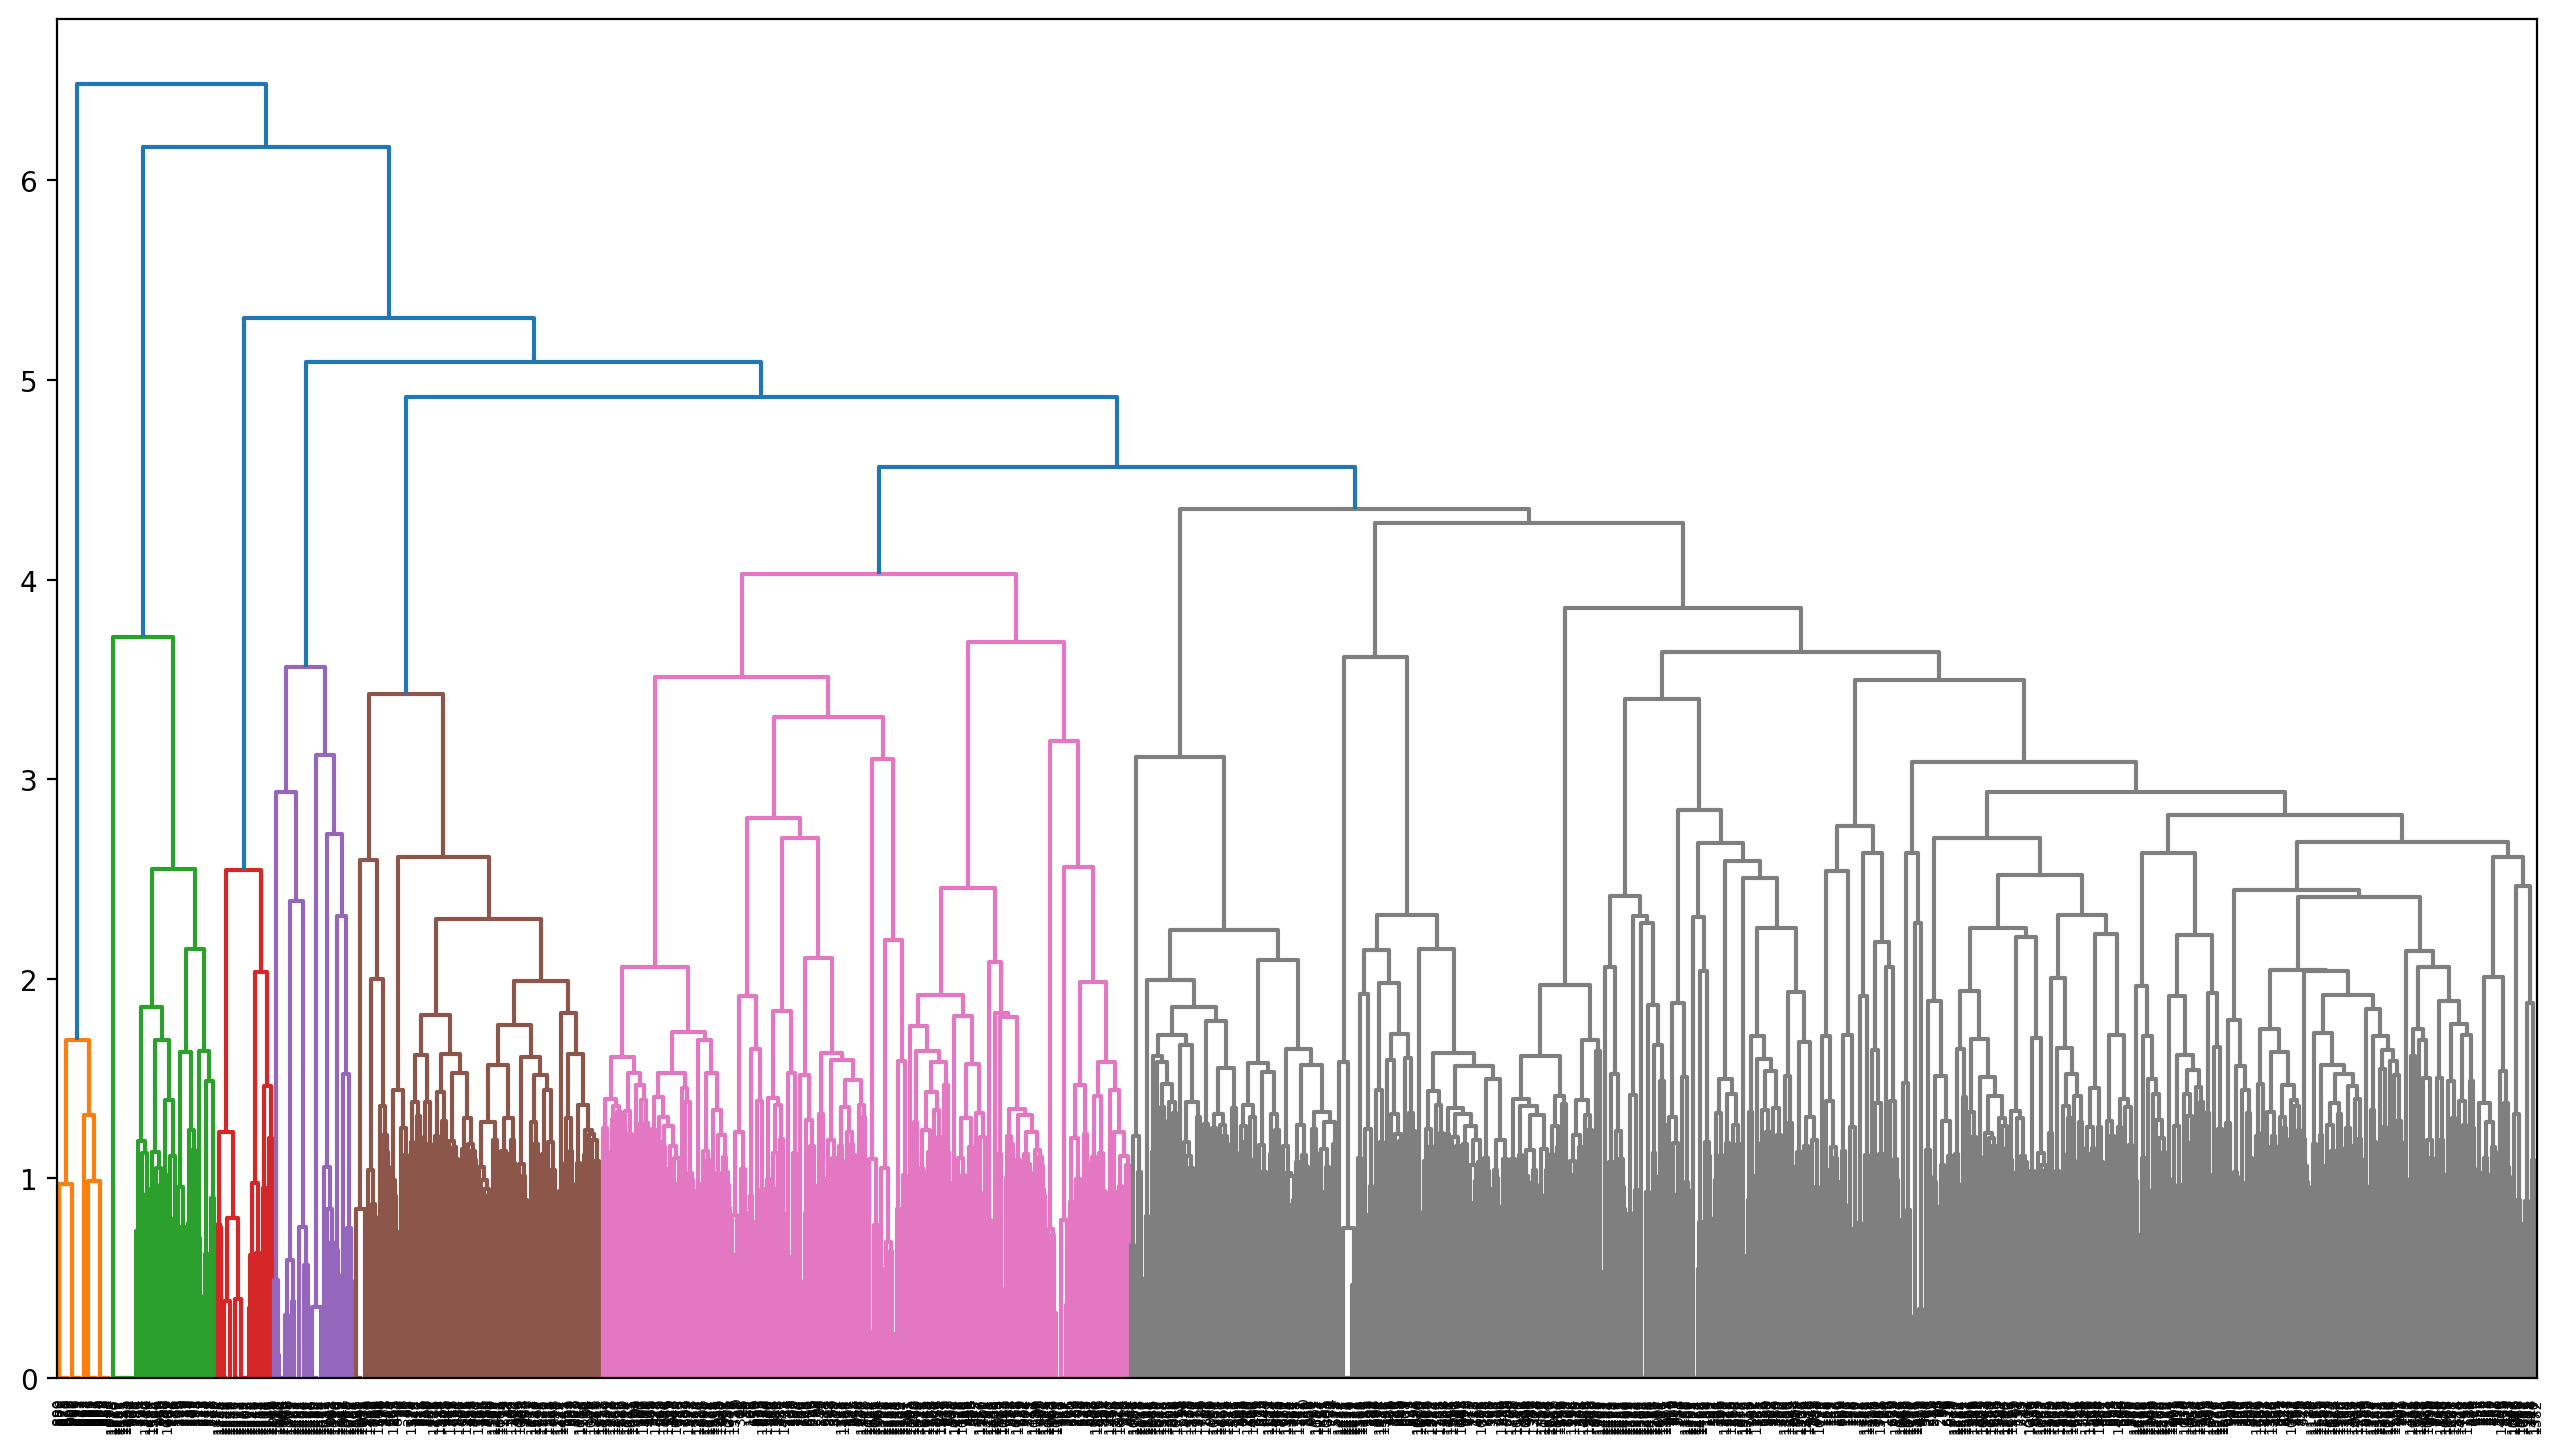

'\nfor doc, cls in zip(paths.keys(), gmm):\n    sub=getname.GetNameJ(doc)\n    print(cls, sub)\n    \n    if getname.GetNameJ(doc) is None:\n        continue\n    \n    lis.append((cls, sub))\n    \nlis.sort()\nprint(lis)\n'

In [12]:
import json
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer
docs=[]
path_open = open('path_clustering.json', 'r')
paths = json.load(path_open)
for path in paths.values():
    df = pd.read_csv(path)
    #print(df.columns)
    #print(df['原型'])
    words = " ".join(str(df['原型']))
    docs.append(words)
vectorizer = TfidfVectorizer(use_idf=True, token_pattern=u'(?u)\\b\\w+\\b')
vecs = vectorizer.fit_transform(docs)
from sklearn import mixture, cluster
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
#from sklearn.cluster import AffinityPropagation
#from sklearn.mixture import BayesianGaussianMixture 
import getname
#from sklearn.cluster import MeanShift
import hierarchy_cluster
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
print('start')
#bgm=BayesianGaussianMixture(n_components=10).fit_predict(vecs.toarray())
#gmm=mixture.bgm
#gmm = mixture.BayesianGaussianMixture(n_components=30).fit_predict(vecs.toarray())
#gmm = AffinityPropagation(random_state=0).fit_predict(vecs.toarray())  #最初の４文書をクラスタリング
#clustering = MeanShift().fit(vecs.toarray())
#gmm=clustering.labels_
gmm=hierarchy_cluster.hierarchy_cluster(vecs.toarray())
print('end')
lis = []
plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
dendrogram(gmm)
plt.show()
'''
for doc, cls in zip(paths.keys(), gmm):
    sub=getname.GetNameJ(doc)
    print(cls, sub)
    
    if getname.GetNameJ(doc) is None:
        continue
    
    lis.append((cls, sub))
    
lis.sort()
print(lis)
'''

In [13]:
print(gmm)

[[1.12100000e+03 1.12700000e+03 0.00000000e+00 2.00000000e+00]
 [7.06000000e+02 7.09000000e+02 0.00000000e+00 2.00000000e+00]
 [7.10000000e+02 1.58100000e+03 0.00000000e+00 3.00000000e+00]
 ...
 [3.11300000e+03 3.15500000e+03 5.31299160e+00 1.47800000e+03]
 [3.14800000e+03 3.15600000e+03 6.16865445e+00 1.54600000e+03]
 [3.01600000e+03 3.15700000e+03 6.48447281e+00 1.58000000e+03]]


NameError: name 'paths' is not defined